# Import Libreries

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Analisis Web

In [2]:
url = 'https://www.bookdepository.com/es/bestsellers'
response = requests.get(url)
print(response)

<Response [200]>


In [3]:
html = response.content
print(html)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n    <link rel="preconnect" href="https://d3ogvdx946i4sr.cloudfront.net"/>\n<link rel="dns-prefetch" href="https://d3ogvdx946i4sr.cloudfront.net"/>\n<script type="text/javascript">\n        function csmWidgetStart(widgetName) {\n            if (typeof uet == \'function\') {\n                uet(\'bb\', widgetName, {wb: 1});\n            }\n        }\n        function csmWidgetEnd(widgetName) {\n            if (typeof uet == \'function\') {\n                uex(\'ld\', widgetName, {wb: 1});\n            }\n        }\n    </script>\n    <noscript>\n        <style>\n            .hide-when-no-js {\n                display: none !important;\n            }\n\n            .show-when-no-js {\n                display: block !important;\n            }\n        </style>\n    </noscript>\n\n    <script type="text/javascript">\n    csmWidgetStart("optimizelySnippetLoadTime");\n</script>\n<script src="https://cdn.optimizely.com/js/8322250184.js"></script

In [4]:
soup = bs(html, "lxml")
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<link href="https://d3ogvdx946i4sr.cloudfront.net" rel="preconnect"/>
<link href="https://d3ogvdx946i4sr.cloudfront.net" rel="dns-prefetch"/>
<script type="text/javascript">
        function csmWidgetStart(widgetName) {
            if (typeof uet == 'function') {
                uet('bb', widgetName, {wb: 1});
            }
        }
        function csmWidgetEnd(widgetName) {
            if (typeof uet == 'function') {
                uex('ld', widgetName, {wb: 1});
            }
        }
    </script>
<noscript>
<style>
            .hide-when-no-js {
                display: none !important;
            }

            .show-when-no-js {
                display: block !important;
            }
        </style>
</noscript>
<script type="text/javascript">
    csmWidgetStart("optimizelySnippetLoadTime");
</script>
<script src="https://cdn.optimizely.com/js/8322250184.js"></script>
<script type="text/javascript">
    csmWidgetEnd("optimizelySnippet

In [5]:
soup.title

<title>
	Bestselling books online with free delivery at Book Depository</title>

In [6]:
soup.h1

<h1>Los más vendidos — nuestros artículos más populares, actualizados diariamente.</h1>

In [7]:
soup.h1.get_text()

'Los más vendidos — nuestros artículos más populares, actualizados diariamente.'

In [8]:
soup.a

<a class="close-button" href="#"><i class="icon-close"></i></a>

In [9]:
print("Without . find()")
print(soup.h1)
print("With . find()")
print(soup.find("h1"))

Without . find()
<h1>Los más vendidos — nuestros artículos más populares, actualizados diariamente.</h1>
With . find()
<h1>Los más vendidos — nuestros artículos más populares, actualizados diariamente.</h1>


In [10]:
all_a = soup.find_all("a")
for a in all_a[:5]:
    print(a)

<a class="close-button" href="#"><i class="icon-close"></i></a>
<a href="/help/topic/HelpId/53/How-we-use-cookies#helpContent" target='"_blank"'>uso de cookies</a>
<a class="home-icon-link" href="/es/"><i class="icon-home"></i><span class="show-non-desktop">Inicio</span></a>
<a href="/es/contactus"><i class="icon-em"></i>Contáctanos</a>
<a href="/es/help" rel="nofollow"><i class="icon-info"></i>Ayuda</a>


# Extract Data

#### Getting the book titles

In [11]:
all_h3 = soup.find_all("h3", class_="title")
for h3 in all_h3:
    print(h3.get_text(strip=True))

It Ends With Us: The most heartbreaking novel you'll ever read
Where the Crawdads Sing
Seven Husbands of Evelyn Hugo
Verity
The Love Hypothesis
Ugly Love
Chainsaw Man, Vol. 10
Atomic Habits
Heaven Official's Blessing: Tian Guan Ci Fu (Novel) Vol. 2
The Kiss Quotient
Chainsaw Man, Vol. 1
The Midnight Library
The Song of Achilles
Jujutsu Kaisen, Vol. 15
Glucose Revolution
Bridgerton: The Viscount Who Loved Me (Bridgertons Book 2)
The Spanish Love Deception
The Scum Villain's Self-Saving System: Ren Zha Fanpai Zijiu Xitong (Novel) Vol. 2
Before the Coffee Gets Cold
The Husky and His White Cat Shizun: Erha He Ta De Bai Mao Shizun (Novel) Vol. 1
Embroidering Her Truth
Pachinko
Spy x Family, Vol. 7
The Psychology of Money
The Fine Print
Putin's People
The Body Keeps the Score
November 9
Jujutsu Kaisen 0
Lud-In-The-Mist


#### Getting the book frormats

In [12]:
format = soup.select("div.item-info p.format")
formats_series = pd.Series(format)
formats_series.value_counts()

[Paperback]    29
[Hardback]      1
dtype: int64

#### Gettting the publication dates

In [13]:
dates = soup.find_all("p", class_="published")
dates = [date.get_text()[-4:] for date in dates]
dates_series = pd.Series(dates)
dates_series.value_counts()

2022    12
2021     6
2018     3
2016     2
2019     2
2017     2
2015     2
2020     1
dtype: int64

#### Getting the prices

In [14]:
final_prices = []
prices = soup.find_all("p", class_="price")
for price in prices:
    original_price = price.find("span", class_="rrp")
    if original_price:
        current_price = str(original_price.previousSibling).strip()
        current_price = float(current_price.split(" ")[0].replace(",", "."))
    else:
        current_price = str(price.get_text(strip=True).split(" ")[0].replace(",", "."))
        current_price = float(price.get_text(strip=True).replace("US$",""))
    final_prices.append(current_price)
    
print(final_prices)      

[20.81, 20.36, 20.81, 20.36, 20.36, 20.81, 19.98, 28.63, 29.5, 17.46, 19.98, 21.25, 21.68, 19.98, 26.11, 20.5, 20.81, 23.52, 21.03, 23.6, 27.64, 21.83, 19.98, 27.27, 22.54, 23.16, 25.47, 20.81, 19.05, 20.36]


#### Data & Histogram

<AxesSubplot:xlabel='Book prices in euro', ylabel='Number of books'>

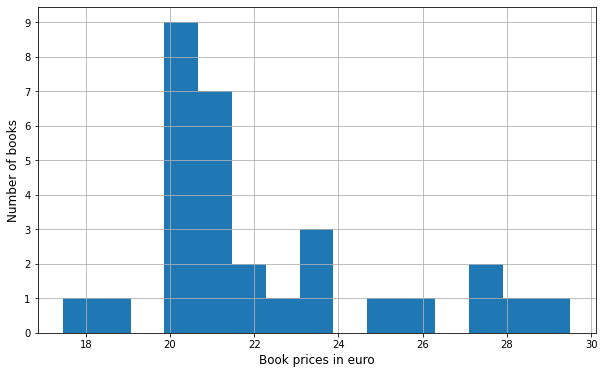

In [15]:
s_final_prices = pd.Series(final_prices)
plt.figure(figsize=(10,6))
plt.xticks(np.arange(0,40,step=2))
plt.yticks(np.arange(0,11,step=1))
plt.xlabel("Book prices in euro", fontsize=12)
plt.ylabel("Number of books", fontsize=12)
s_final_prices.hist(bins=15)